In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [117]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing

In [118]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [120]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

P:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


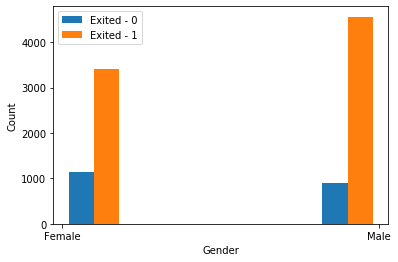

In [121]:
# plot a graph to see the distribution of the Gender data with Exited column
Exited_1 = df[df.Exited == 1].Gender
Exited_0 = df[df.Exited == 0].Gender

plt.ylabel('Count')
plt.xlabel('Gender')

plt.hist([Exited_1, Exited_0], bins=5, label=['Exited - 0', 'Exited - 1'])
plt.legend()

In [122]:
df['Gender'] = df.Gender.apply(lambda x: 0 if x == 'Female' else 1)
df.head() # 0 - Female, 1 - Male

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [123]:
# get dummies for Geography
df = pd.get_dummies(df, ['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


## Train Test Split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis='columns'), df.Exited, test_size=0.2, random_state=42)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [126]:
y_train.value_counts()

0    6356
1    1644
Name: Exited, dtype: int64

<p> The Data clearly shows that it is not balanced. </p>

<strong> Contents </strong>

- Without Balancing
- Under Sampling
- Over sampling : Duplicate
- Over sampling : SMOTE
- Ensemble

In [127]:
def get_model(X_train, y_train, X_test, y_test):
    # building a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    print('Accuracy: ' + str(model.score(X_test, y_test)*100))

    y_pred = model.predict(X_test)

    # classification report
    print(classification_report(y_test, y_pred))

    # confusion matrix
    print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True))

    return y_pred

  


## Without Balancing

Accuracy: 80.05
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

AxesSubplot(0.125,0.125;0.62x0.755)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

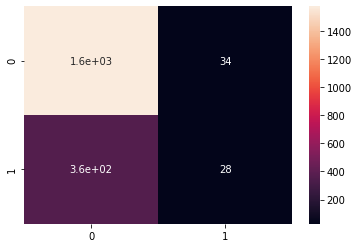

In [128]:
get_model(X_train, y_train, X_test, y_test)

## 1. Under Sampling

In [129]:
df_class_0  = df[df.Exited == 0]
df_class_1  = df[df.Exited == 1]

df_class_0_under = df_class_0.sample(df_class_1.shape[0])

df_class_1.shape, df_class_0_under.shape

((2037, 13), (2037, 13))

In [130]:
df_test_under = pd.concat([df_class_1, df_class_0_under])
df_test_under.shape

(4074, 13)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(df_test_under.drop('Exited', axis='columns'), df_test_under.Exited, test_size=0.2, random_state=42, stratify=df_test_under.Exited)

Accuracy: 65.39877300613497
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       408
           1       0.65      0.66      0.66       407

    accuracy                           0.65       815
   macro avg       0.65      0.65      0.65       815
weighted avg       0.65      0.65      0.65       815

AxesSubplot(0.125,0.125;0.62x0.755)


array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

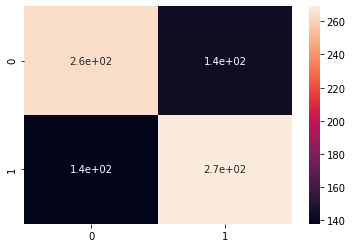

In [132]:
get_model(X_train, y_train, X_test, y_test)

## 2. Over Sampling : Duplicate

In [133]:
df_class_0 = df[df.Exited == 0]
df_class_1 = df[df.Exited == 1]

df_class_1_over = df_class_1.sample(df_class_0.shape[0], replace=True)

In [134]:
df_class_0.shape, df_class_1_over.shape

((7963, 13), (7963, 13))

In [135]:
df_test_over = pd.concat([df_class_0, df_class_1_over])
df_test_over.shape

(15926, 13)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(df_test_over.drop('Exited', axis='columns'), df_test_over.Exited, test_size=0.2, random_state=42, stratify=df_test_over.Exited)

Accuracy: 65.78782172002511
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1593
           1       0.66      0.66      0.66      1593

    accuracy                           0.66      3186
   macro avg       0.66      0.66      0.66      3186
weighted avg       0.66      0.66      0.66      3186

AxesSubplot(0.125,0.125;0.62x0.755)


array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

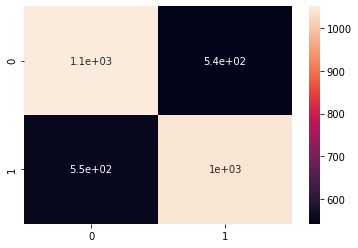

In [137]:
get_model(X_train, y_train, X_test, y_test)

## 3. Over Sampling : SMOTE

In [138]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
x_res, y_res = smote.fit_resample(df.drop('Exited', axis='columns'), df.Exited)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [140]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

Accuracy: 56.089139987445066
              precision    recall  f1-score   support

           0       0.57      0.47      0.52      1593
           1       0.55      0.65      0.60      1593

    accuracy                           0.56      3186
   macro avg       0.56      0.56      0.56      3186
weighted avg       0.56      0.56      0.56      3186

AxesSubplot(0.125,0.125;0.62x0.755)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

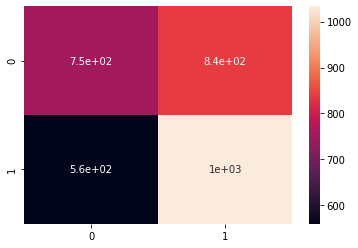

In [141]:
get_model(X_train, y_train, X_test, y_test)

## 4. Ensemble

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis='columns'), df.Exited, test_size=0.2, random_state=42, stratify=df.Exited)

In [143]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 12), (2000, 12), (8000,), (2000,))

In [144]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [145]:
df3 = X_train.copy()
df3['Exited'] = y_train


In [146]:
df3_class_0 = df3[df3.Exited == 0]
df3_class_1 = df3[df3.Exited == 1]

In [152]:
6370/1630

3.9079754601226995

In [147]:
def get_batch(df_majority, df_minority, start, end):
    df_batch = pd.concat([df_majority.iloc[start:end], df_minority])
    
    X_train = df_batch.drop('Exited', axis='columns')
    y_train = df_batch.Exited

    return X_train, y_train   
    
    

In [148]:
df3_class_0.shape, df3_class_1.shape

((6370, 13), (1630, 13))

Accuracy: 64.35
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.64      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.64      0.68      2000

AxesSubplot(0.125,0.125;0.62x0.755)


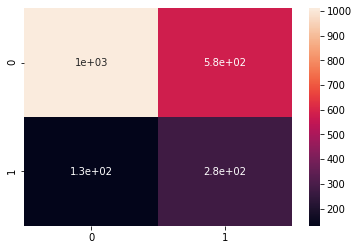

In [149]:
X_train, y_train = get_batch(df3_class_0, df3_class_1, 0, 1630)

y_pred1 = get_model(X_train, y_train, X_test, y_test)


Accuracy: 64.8
              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1593
           1       0.33      0.68      0.44       407

    accuracy                           0.65      2000
   macro avg       0.61      0.66      0.59      2000
weighted avg       0.77      0.65      0.68      2000

AxesSubplot(0.125,0.125;0.62x0.755)


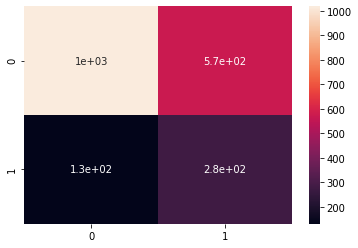

In [150]:
X_train, y_train = get_batch(df3_class_0, df3_class_1, 1630, 3270)

y_pred2 = get_model(X_train, y_train, X_test, y_test)

Accuracy: 50.8
              precision    recall  f1-score   support

           0       0.83      0.48      0.61      1593
           1       0.23      0.61      0.34       407

    accuracy                           0.51      2000
   macro avg       0.53      0.55      0.47      2000
weighted avg       0.71      0.51      0.55      2000

AxesSubplot(0.125,0.125;0.62x0.755)


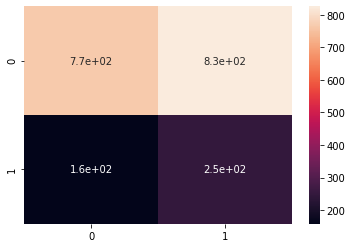

In [151]:
X_train, y_train = get_batch(df3_class_0, df3_class_1, 3270, 4910)

y_pred3 = get_model(X_train, y_train, X_test, y_test)

Accuracy: 61.199999999999996
              precision    recall  f1-score   support

           0       0.89      0.58      0.71      1593
           1       0.31      0.72      0.43       407

    accuracy                           0.61      2000
   macro avg       0.60      0.65      0.57      2000
weighted avg       0.77      0.61      0.65      2000

AxesSubplot(0.125,0.125;0.62x0.755)


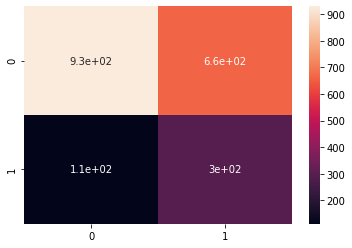

In [154]:
X_train, y_train = get_batch(df3_class_0, df3_class_1, 4910, 6370)

y_pred4 = get_model(X_train, y_train, X_test, y_test)

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      1593
           1       0.32      0.68      0.44       407

    accuracy                           0.64      2000
   macro avg       0.60      0.66      0.59      2000
weighted avg       0.77      0.64      0.68      2000



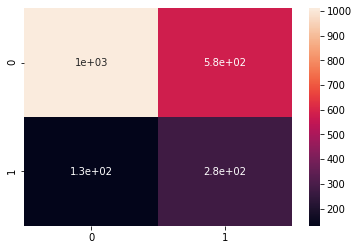

In [158]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

print(sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True))

print(classification_report(y_test, y_pred_final))


